# Model Clustering dengan Hierarchical / AgglomerativeClustering

## Import Library

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA # Tambahan untuk visualisasi 2D yang lebih baik

## Modeling dengan dataset yang di Label Encoding

### Load Dataset

In [108]:
df = pd.read_csv('DataCleanLabel.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


### Feature Selection dan Scaling Data

In [109]:
obese = df['NObeyesdad']
obese

features = [                                   
    'FAVC', 'CAEC','FAF','NCP', 'SMOKE', 'SCC'                   
]

# df_label_cluster = df[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently',]]
# df_label_cluster = df[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', "FCVC", "NCP", "SCC",]]
# df_label_cluster["BMI"] = df_label_cluster["Weight"] / ((df_label_cluster["Height"]/100) ** 2)
# df_label_cluster = df_label_cluster.drop(columns=["Weight", "Height"])

df_label_cluster = df[features]
df = df.drop(columns="NObeyesdad")
# df = df.drop(columns=features_to_drop)

df_scaled = MinMaxScaler().fit_transform(df_label_cluster)
# df_scaled = df
df_scaled

array([[0.        , 0.66666667, 0.        , 0.66666667, 0.        ,
        0.        ],
       [0.        , 0.66666667, 1.        , 0.66666667, 1.        ,
        1.        ],
       [0.        , 0.66666667, 0.66666667, 0.66666667, 0.        ,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.471403  , 0.66666667, 0.        ,
        0.        ],
       [1.        , 0.66666667, 0.37970233, 0.66666667, 0.        ,
        0.        ],
       [1.        , 0.66666667, 0.34215067, 0.66666667, 0.        ,
        0.        ]], shape=(2064, 6))

### Dendogram

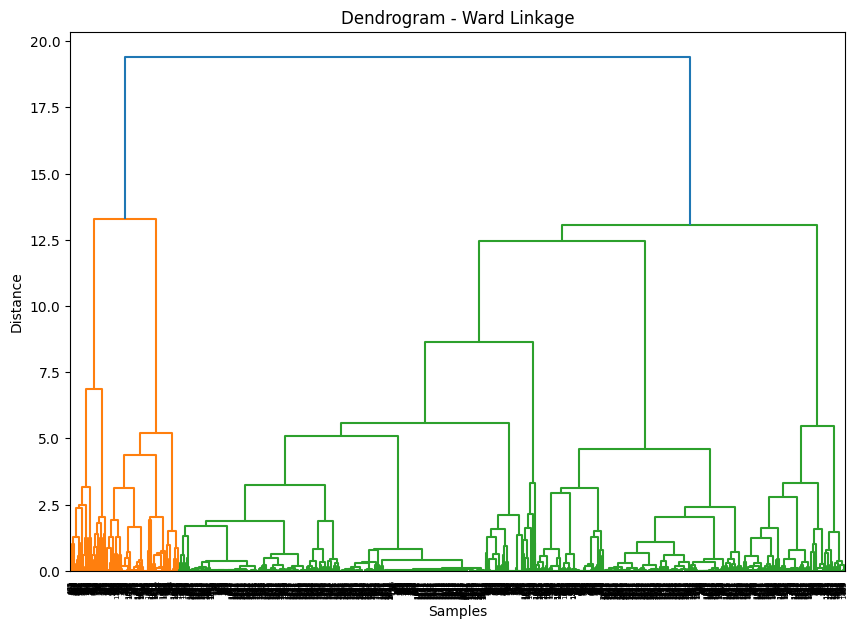

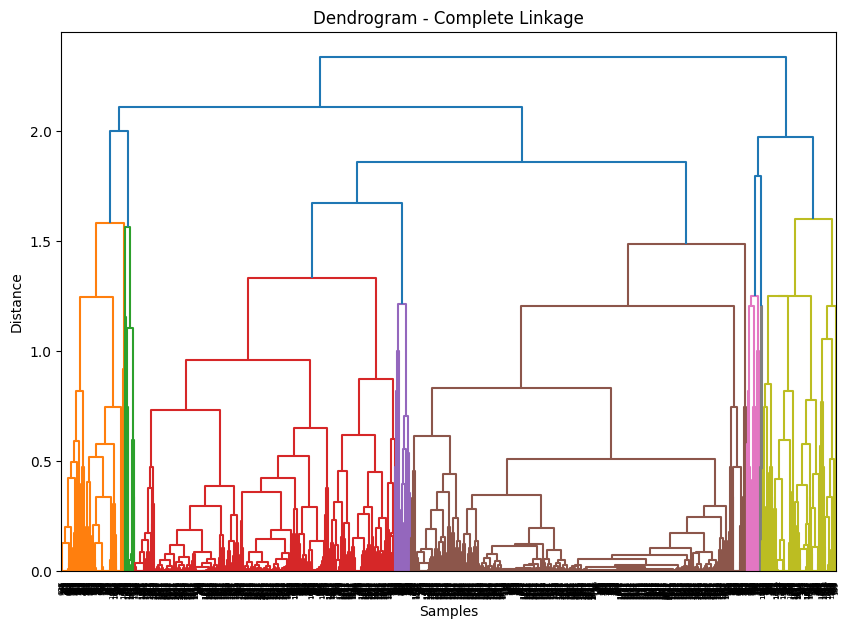

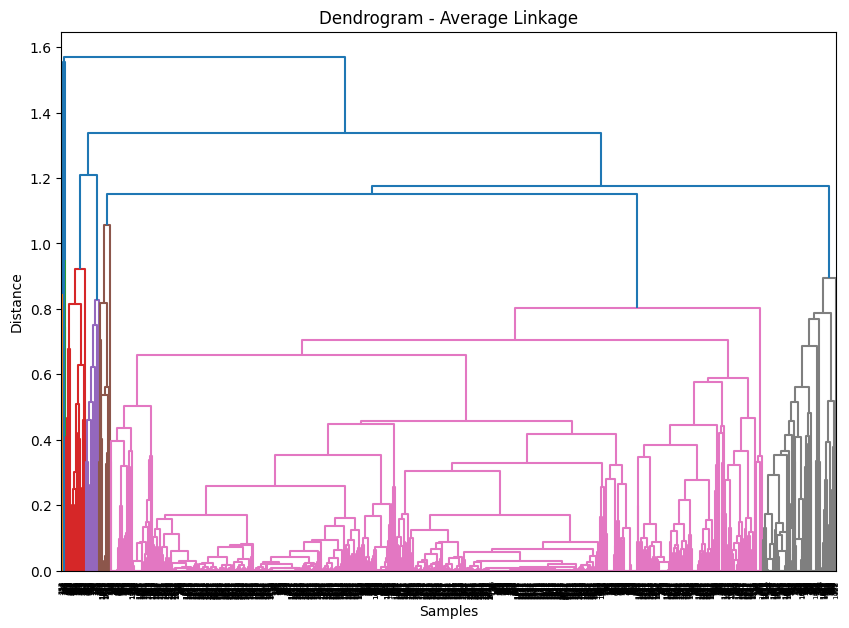

In [110]:

# Visualisasi Dendrogram
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

linked = linkage(df_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



### Membuat Model dengan Jumlah Cluster yang udah di tentukan

In [111]:
agg_ward = AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df_scaled)
agg_avg = AgglomerativeClustering(n_clusters=4, linkage="average")
labels_avg = agg_avg.fit_predict(df_scaled)
agg_complete = AgglomerativeClustering(n_clusters=4, linkage="complete")
labels_complete = agg_complete.fit_predict(df_scaled)

In [112]:
silhouette_ward = silhouette_score(df_scaled, labels_ward)
silhouette_avg = silhouette_score(df_scaled, labels_avg)
silhouette_complete = silhouette_score(df_scaled, labels_complete)

print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.4236040560748644
Silhouette Score (Average Linkage): 0.5079574042763735
Silhouette Score (Complete Linkage): 0.26506198431622513


## Modeling dengan dataset yang di OneHot Encoding

In [113]:
df = pd.read_csv('DataCleanOneHot.csv')

# df_onehot_cluster = df[['Weight', 'Height', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently', 'FAF', "FCVC"]]
# df_onehot_cluster["BMI"] = df_onehot_cluster["Weight"] / ((df_onehot_cluster["Height"]/100) ** 2)
# df_onehot_cluster = df_onehot_cluster.drop(columns=["Weight", "Height"])

features = [                                   
    'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF',                                     
    'NCP', 'SMOKE_yes', 'SCC_yes'                   
]

df_onehot_cluster = df[features]

df_onehot = df_onehot_cluster
df_onehot_scaled = MinMaxScaler().fit_transform(df_onehot)
df_onehot_scaled

array([[0.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ]], shape=(2064, 8))

### Dendogram

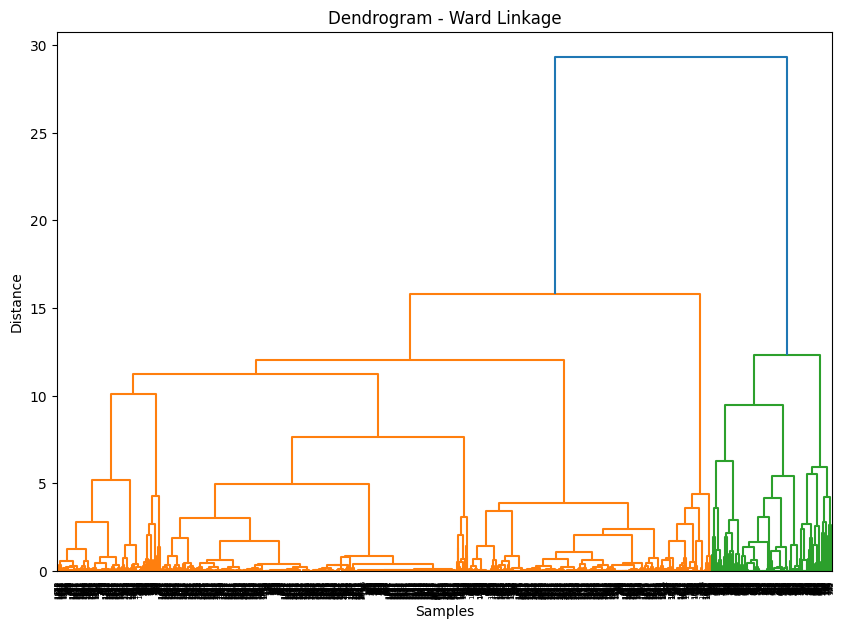

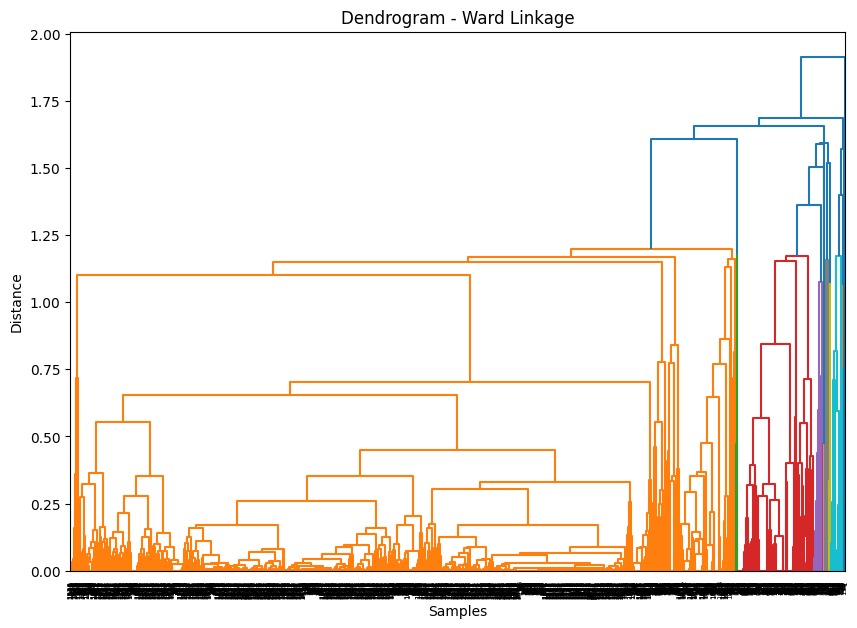

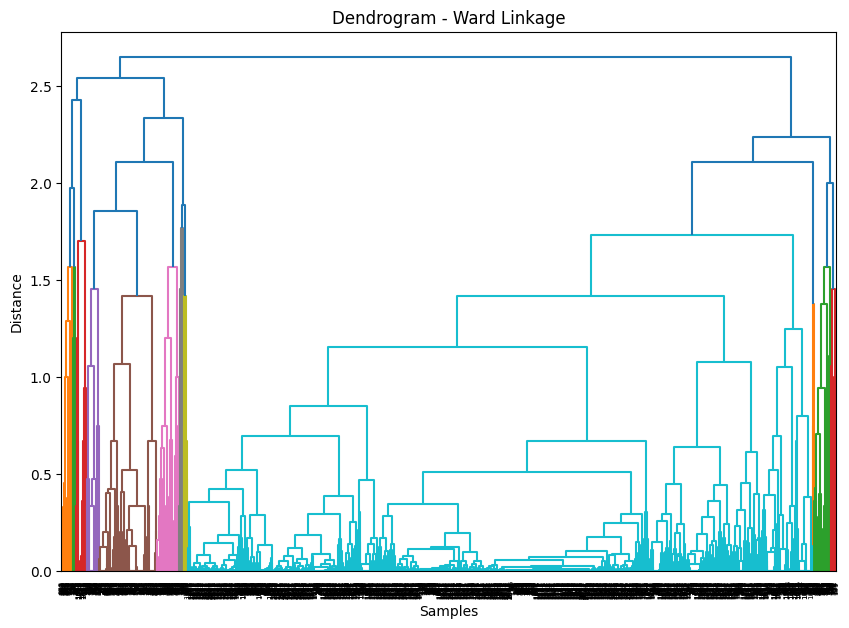

In [114]:
# Visualisasi Dendrogram
linked = linkage(df_onehot_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df_onehot_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  

linked = linkage(df_onehot_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()  


### Modeling dengan jumlah cluster yang sudah di tentukan

In [115]:
agg_ward = AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean")
labels_ward = agg_ward.fit_predict(df_onehot_scaled)

agg_avg = AgglomerativeClustering(n_clusters=4, linkage="average")
labels_avg = agg_avg.fit_predict(df_onehot_scaled)

agg_complete = AgglomerativeClustering(n_clusters=4, linkage="complete")
labels_complete = agg_complete.fit_predict(df_onehot_scaled)


In [116]:
silhouette_ward = silhouette_score(df_onehot_scaled, labels_ward)
silhouette_avg = silhouette_score(df_onehot_scaled, labels_avg)
silhouette_complete = silhouette_score(df_onehot_scaled, labels_complete)

print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.5276797686475655
Silhouette Score (Average Linkage): 0.5793563763315516
Silhouette Score (Complete Linkage): 0.48440204960189637


In [117]:
#import model clustering yang terpilih
df_onehot['Cluster'] = labels_avg
df_onehot.head()

df_onehot.to_csv("DataClustering.csv")

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_23966/1410332378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onehot['Cluster'] = labels_avg


## Modeling menggunakan dataset yang di Label Encoding dan One Hot Encoding

### Load dataset dan Feature Selection

In [118]:
df_label = pd.read_csv('DataCleanLabel.csv') 
df_onehot = pd.read_csv('DataCleanOneHot.csv')

display(df_label.head())
display(df_onehot.info())

# numerical_features = ['Weight', 'Height', 'FCVC', 'FAF']
# categorical_features = ['family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently']
features = [                                   
    'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF',                                     
    'NCP', 'SMOKE', 'SCC'                   
]


df_combined = pd.DataFrame({
    "FCVC": df_onehot['FCVC'],
    "FAF": df_onehot['FAF'],
    "FAVC": df_label['FAVC'],
    "CAEC_Sometimes": df_onehot['CAEC_Sometimes'],
    "CAEC_no": df_onehot['CAEC_no'],
    "CAEC_Frequently": df_onehot['CAEC_Frequently'],
    "NCP": df_onehot['NCP'],
    "SCC_yes": df_onehot['SCC_yes'],
    "SMOKE_yes": df_onehot['SMOKE_yes'],
})

# df_combined["BMI"] = df_combined["Weight"] / ((df_combined["Height"]/100) ** 2)
# df_combined = df_combined.drop(columns=["Weight", "Height"])


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   NObeyesdad                          2064 non-null   object 
 9   Gender_Male                         2064 non-null   int64  
 10  SMOKE_yes                           2064 non-null   int64  
 11  FAVC_yes                            2064 no

None

### Scaling data

In [119]:
df_combined_scaled = MinMaxScaler().fit_transform(df_combined)
df_combined_scaled

array([[0.5       , 0.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.5       , 0.66666667, 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [1.        , 0.471403  , 1.        , ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 0.37970233, 1.        , ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 0.34215067, 1.        , ..., 0.66666667, 0.        ,
        0.        ]], shape=(2064, 9))

### Dendogram

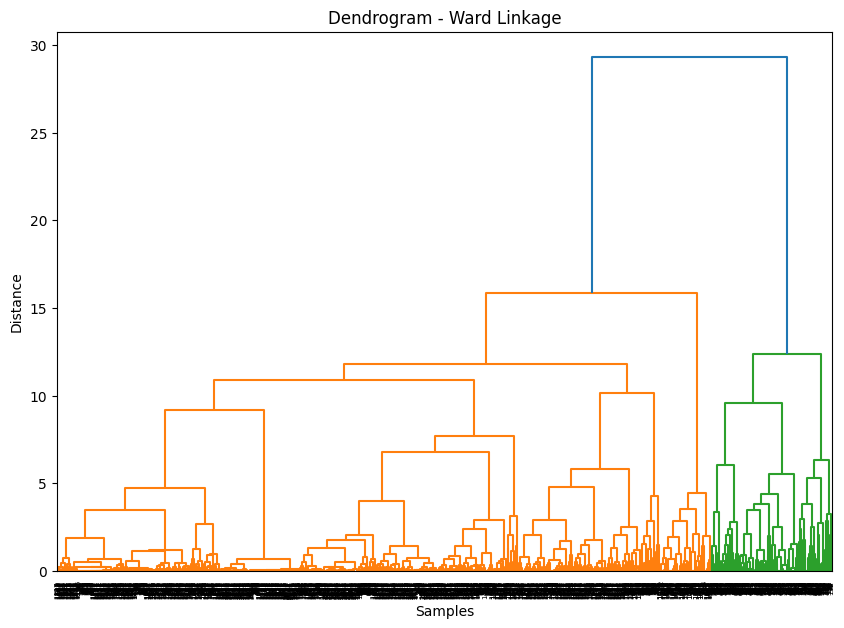

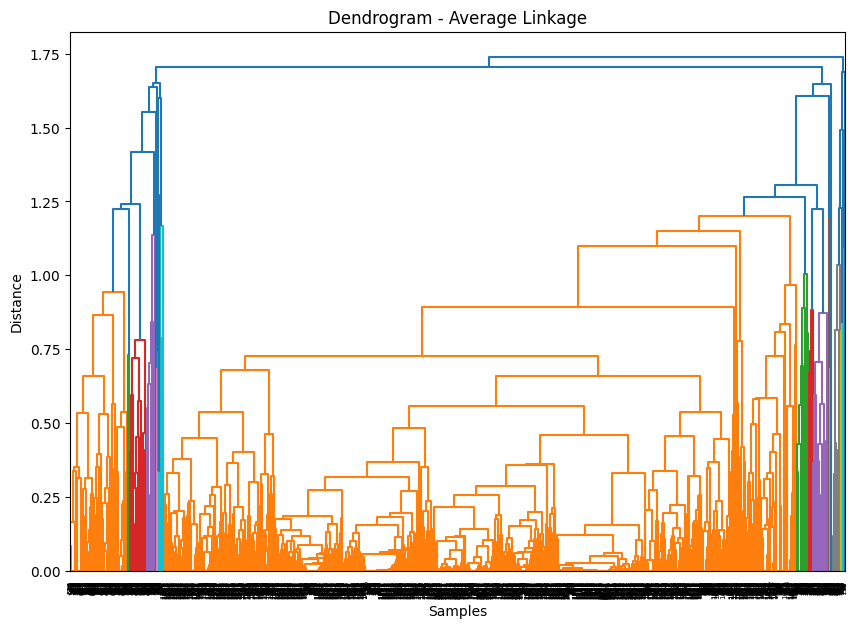

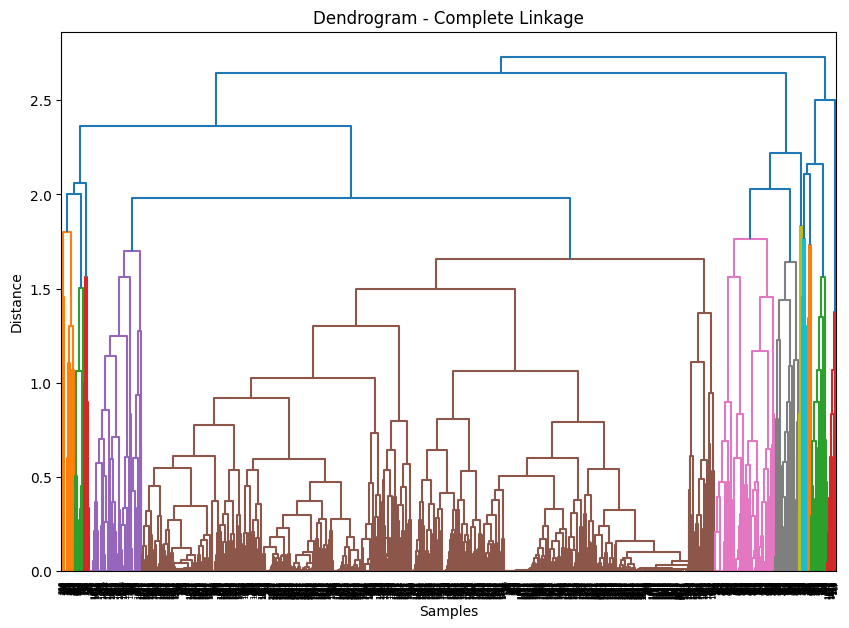

In [120]:
linked = linkage(df_combined_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
linked = linkage(df_combined_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
linked = linkage(df_combined_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Modeling dengan jumlah cluster yang telah di tentukan

In [121]:
agg_ward = AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean")
labels_ward_combine = agg_ward.fit_predict(df_combined_scaled)
agg_avg = AgglomerativeClustering(n_clusters=4, linkage="average")
labels_avg = agg_avg.fit_predict(df_combined_scaled)
agg_complete = AgglomerativeClustering(n_clusters=4, linkage="complete")
labels_complete = agg_complete.fit_predict(df_combined_scaled)

In [122]:
silhouette_ward = silhouette_score(df_combined_scaled, labels_ward_combine)
silhouette_avg = silhouette_score(df_combined_scaled, labels_avg)
silhouette_complete = silhouette_score(df_combined_scaled, labels_complete)

print(f'Silhouette Score (Ward Linkage): {silhouette_ward}')
print(f'Silhouette Score (Average Linkage): {silhouette_avg}')
print(f'Silhouette Score (Complete Linkage): {silhouette_complete}')

Silhouette Score (Ward Linkage): 0.44844736141788716
Silhouette Score (Average Linkage): 0.5332886412669442
Silhouette Score (Complete Linkage): 0.4135316147493066
